<a href="https://colab.research.google.com/github/Ehizson/AI-ML-Paths/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective


*   Clean the First given data
*   Clean the Second sourced data
*   Clean the third rural population data
*   Generate urban population feature from the rural data
*   Merged the first data and second data together on top of each other
*   Merged the previous merged data with the population data using left join
*   generate another rural electric rate and urban electric rate from the final merged data
*   do the final cleaning
*   Save the final data into CSV file
















In [ ]:
!pip install category_encoders


In [ ]:
# library importation
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
# Loading data from GitHub Raw URLs
df1_url = 'https://raw.githubusercontent.com/armaf002/GCP/main/MES_0423%20(1).csv'  # first dataset
df2_url = 'https://raw.githubusercontent.com/armaf002/GCP/main/electricity_generation%20(2).csv'  #second dataset
df_ruralpop_url = 'https://raw.githubusercontent.com/armaf002/GCP/main/API_SP.RUR.TOTL.ZS_DS2_en_csv_v2_5728953.csv' # % rural population

df1 = pd.read_csv(df1_url)
df2 = pd.read_csv(df2_url)
df_ruralpop = pd.read_csv(df_ruralpop_url)

In [ ]:
#displaying the shape of the 3 datasets
df1.shape, df2.shape, df_ruralpop.shape

((132019, 6), (4075, 8), (266, 67))

In [ ]:
 #first 5 rows of the first dataset
df1.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,Apr-23,Net Electricity Production,Electricity,20129.2911,GWh
1,Australia,Apr-23,Net Electricity Production,Total Combustible Fuels,13328.1324,GWh
2,Australia,Apr-23,Net Electricity Production,"Coal, Peat and Manufactured Gases",9343.7772,GWh
3,Australia,Apr-23,Net Electricity Production,Oil and Petroleum Products,319.9711,GWh
4,Australia,Apr-23,Net Electricity Production,Natural Gas,3416.8759,GWh


In [ ]:
value_counts = df1['Balance'].value_counts()

print(value_counts)


Net Electricity Production        101576
Final Consumption (Calculated)      6540
Distribution Losses                 6539
Total Exports                       5951
Total Imports                       5945
Used for pumped storage             5456
Remarks                               12
Name: Balance, dtype: int64


In [ ]:
 #first 5 rows of the second dataset
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.0,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.0,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.0,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.0,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.0,NaN


In [ ]:
value_counts = df2['FREQUENCY'].value_counts()

print(value_counts)


A    4075
Name: FREQUENCY, dtype: int64


In [ ]:
#first 5 rowas of the % rural dataset
df_ruralpop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.22400,49.23900,49.254000,49.270000,49.285000,49.300000,...,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,55.948000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.43619,85.18859,84.930751,84.652024,84.359805,84.058718,...,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301,62.175407


In [ ]:
value_counts = df_ruralpop['Indicator Code'].value_counts()

print(value_counts)


SP.RUR.TOTL.ZS    266
Name: Indicator Code, dtype: int64


### Cleaning DF1

In [ ]:
#displaying the unique years in df1
df1['Time'].unique()

array(['Apr-23', 'Mar-23', 'Feb-23', 'Jan-23', 'Dec-22', 'Nov-22',
       'Oct-22', 'Sep-22', 'Aug-22', 'Jul-22', 'Jun-22', 'May-22',
       'Apr-22', 'Mar-22', 'Feb-22', 'Jan-22', 'Dec-21', 'Nov-21',
       'Oct-21', 'Sep-21', 'Aug-21', 'Jul-21', 'Jun-21', 'May-21',
       'Apr-21', 'Mar-21', 'Feb-21', 'Jan-21', 'Dec-20', 'Nov-20',
       'Oct-20', 'Sep-20', 'Aug-20', 'Jul-20', 'Jun-20', 'May-20',
       'Apr-20', 'Mar-20', 'Feb-20', 'Jan-20', 'Dec-19', 'Nov-19',
       'Oct-19', 'Sep-19', 'Aug-19', 'Jul-19', 'Jun-19', 'May-19',
       'Apr-19', 'Mar-19', 'Feb-19', 'Jan-19', 'Dec-18', 'Nov-18',
       'Oct-18', 'Sep-18', 'Aug-18', 'Jul-18', 'Jun-18', 'May-18',
       'Apr-18', 'Mar-18', 'Feb-18', 'Jan-18', 'Dec-17', 'Nov-17',
       'Oct-17', 'Sep-17', 'Aug-17', 'Jul-17', 'Jun-17', 'May-17',
       'Apr-17', 'Mar-17', 'Feb-17', 'Jan-17', 'Dec-16', 'Nov-16',
       'Oct-16', 'Sep-16', 'Aug-16', 'Jul-16', 'Jun-16', 'May-16',
       'Apr-16', 'Mar-16', 'Feb-16', 'Jan-16', 'Dec-15', 'Nov-

In [ ]:
#displaying the unique and number of unique countries in df1
print(df1.Country.unique())
print(df1.Country.nunique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Republic of Turkiye' 'United Kingdom' 'United States'
 'OECD Americas' 'OECD Asia Oceania' 'OECD Europe' 'OECD Total'
 'IEA Total' 'Argentina' 'Brazil' 'Bulgaria' "People's Republic of China"
 'Croatia' 'Cyprus' 'India' 'Malta' 'North Macedonia' 'Romania' 'Serbia']
53


In [ ]:
#Convert the 'Time' column to represent the year only
df1['Time'] = pd.to_datetime(df1['Time'], format='%b-%y').dt.year

# Drop all rows with '2023' in the 'Time' column because we are still in the year 2023, hence no complete information to use
df1 = df1[df1['Time'] != 2023]

# Group by 'Time' (year) and calculate the mean 'Value' for each year
df11 = df1.groupby(['Country','Time'], as_index = False)['Value'].mean()
# Renamed the 'Time' column to year
df11.rename(columns={'Time': 'Year'}, inplace=True)
print(df11.shape)
print(df11.head())


(619, 3)
     Country  Year        Value
0  Argentina  2015  2424.100780
1  Argentina  2016  2633.561635
2  Argentina  2017  2640.507181
3  Argentina  2018  2290.702425
4  Argentina  2019  2172.046544


In [ ]:
# Mapping of country names to ISO 3166-1 alpha-3 country codes
country_mapping = {
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Belgium': 'BEL',
    'Canada': 'CAN',
    'Chile': 'CHL',
    'Colombia': 'COL',
    'Costa Rica': 'CRI',
    'Czech Republic': 'CZE',
    'Denmark': 'DNK',
    'Estonia': 'EST',
    'Finland': 'FIN',
    'France': 'FRA',
    'Germany': 'DEU',
    'Greece': 'GRC',
    'Hungary': 'HUN',
    'Iceland': 'ISL',
    'Ireland': 'IRL',
    'Italy': 'ITA',
    'Japan': 'JPN',
    'Korea': 'KOR',
    'Latvia': 'LVA',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Mexico': 'MEX',
    'Netherlands': 'NLD',
    'New Zealand': 'NZL',
    'Norway': 'NOR',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Slovak Republic': 'SVK',
    'Slovenia': 'SVN',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Republic of Turkiye': 'TUR',
    'United Kingdom': 'GBR',
    'United States': 'USA',
    'OECD Americas': 'OECD Americas',
    'OECD Asia Oceania': 'OECD Asia Oceania',
    'OECD Europe': 'OECD Europe',
    'OECD Total': 'OECD Total',
    'IEA Total': 'IEA Total',
    'Argentina': 'ARG',
    'Brazil': 'BRA',
    'Bulgaria': 'BGR',
    "People's Republic of China": 'CHN',
    'Croatia': 'HRV',
    'Cyprus': 'CYP',
    'India': 'IND',
    'Malta': 'MLT',
    'North Macedonia': 'MKD',
    'Romania': 'ROU',
    'Serbia': 'SRB'
}

# Convert the countries to three-letter codes
df11['Location'] = df11['Country'].map(country_mapping)

df11.head()

,Country,Year,Value,Location
0,Argentina,2015,2424.100780,ARG
1,Argentina,2016,2633.561635,ARG
2,Argentina,2017,2640.507181,ARG
3,Argentina,2018,2290.702425,ARG
4,Argentina,2019,2172.046544,ARG


In [ ]:
#dropping the country column
df11.drop(columns=['Country'], inplace=True)
df11.head()


,Year,Value,Location
0,2015,2424.100780,ARG
1,2016,2633.561635,ARG
2,2017,2640.507181,ARG
3,2018,2290.702425,ARG
4,2019,2172.046544,ARG


In [ ]:
#dropping the non oecd countries that are not needed for the analysis
Non_oecd_countries = ['OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total','IEA Total',
                        'ARG', 'BRA', 'BGR', 'CHN', 'HRV', 'CYP', 'IND', 'MLT', 'MKD','ROU', 'SRB']
df11 = df11[~df11['Location'].isin(Non_oecd_countries)]


In [ ]:
print(df11.shape)
print(df11.isnull().sum())
print(df11.head())

(466, 3)
Year        0
Value       0
Location    0
dtype: int64
    Year        Value Location
8   2010  5647.552607      AUS
9   2011  5704.477327      AUS
10  2012  5648.446357      AUS
11  2013  5527.160292      AUS
12  2014  5691.561250      AUS


In [ ]:
# check for Zero value
print(len(df11[df11['Value'] == 0]))

0


### Cleaning DF2

In [ ]:
#displaying the first five rows in df2
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.0,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.0,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.0,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.0,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.0,NaN


In [ ]:
df2['Flag Codes'].value_counts()

L    192
M    120
Z     17
Name: Flag Codes, dtype: int64

In [ ]:
#displaying the unique and number of unique countries in df2
print(df2.LOCATION.unique())
print(df2.LOCATION.nunique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'OEU' 'CHL' 'EST' 'ISR' 'SVN' 'OECD'
 'RUS' 'BRA' 'WLD' 'CHN' 'IDN' 'ZAF' 'IND' 'EU28']
44


In [ ]:
non_oecd_countries = ['OEU', 'OECD', 'RUS', 'BRA', 'WLD', 'IDN', 'ZAF', 'IND', 'EU28', 'CHN']
df2 = df2[~df2['LOCATION'].isin(non_oecd_countries)]

In [ ]:
# Drop the unwanted columns
columns_to_drop = ['SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes', 'INDICATOR']
df2.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Rename the 'TIME', 'LOCATION' and INDICATOR column to 'Year', 'Location' and 'Product' respectively
df2.rename(columns={'TIME': 'Year', 'LOCATION': 'Location'}, inplace=True)

df2.head()

,Location,Year,Value
0,AUS,1960,0.0
1,AUS,1961,0.0
2,AUS,1962,0.0
3,AUS,1963,0.0
4,AUS,1964,0.0


In [ ]:
#checking for missing values
print(df2.isnull().sum())

Location      0
Year          0
Value       188
dtype: int64


In [ ]:
#filling the missing values using the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df2['Value'] = knn_imputer.fit_transform(df2[['Value']])

In [ ]:
print(df2.isnull().sum())
print(df2.shape)

Location    0
Year        0
Value       0
dtype: int64
(3842, 3)


In [ ]:
# check for Zero value
print(len(df2[df2['Value'] == 0]))
print(df2[df2['Value'] == 0].head())
print(df2[df2['Value'] == 0].tail())


1599
  Location  Year  Value
0      AUS  1960    0.0
1      AUS  1961    0.0
2      AUS  1962    0.0
3      AUS  1963    0.0
4      AUS  1964    0.0
     Location  Year  Value
4061      ITA  2014    0.0
4062      LUX  2014    0.0
4067      GRC  2014    0.0
4068      IRL  2014    0.0
4071      POL  2014    0.0


In [ ]:
#Some values in our df have 0, converting the 0 values  to nan
df2['Value'] = df2['Value'].replace(0, float('nan'))
df2['Value'].isnull().sum()


1599

In [ ]:
#using the KNNImputer to fill the nan values
nn_imputer = KNNImputer(n_neighbors=5)
df2['Value'] = knn_imputer.fit_transform(df2[['Value']])

### Cleaning DF rural population

In [ ]:
#  convert the wide row format with years as columns into a long column forma
df_ruralpop = pd.melt(df_ruralpop, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')

df_ruralpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,85.436190
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.599000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,85.294609
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565000


In [ ]:
# Drop the unwanted columns
columns_to_drop = ['Country Name', 'Indicator Name', 'Indicator Code']
df_ruralpop.drop(columns=columns_to_drop, inplace=True)

# Renaming the Time and Value column
df_ruralpop.rename(columns={'TIME': 'Time', 'Value': 'rural pop', 'Country Code': 'Location'}, inplace=True)
df_ruralpop.head()

,Location,Year,rural pop
0,ABW,1960,49.224000
1,AFE,1960,85.436190
2,AFG,1960,91.599000
3,AFW,1960,85.294609
4,AGO,1960,89.565000


In [ ]:
#getting the percentage of urban population by subtracting the rural percentage from 100
df_ruralpop['urban pop'] = 100 - df_ruralpop['rural pop']

# Change the dtype of Year column from 'object' to 'int64'
df_ruralpop['Year'] = df_ruralpop['Year'].astype('int64')

df_ruralpop.head()


,Location,Year,rural pop,urban pop
0,ABW,1960,49.224000,50.776000
1,AFE,1960,85.436190,14.563810
2,AFG,1960,91.599000,8.401000
3,AFW,1960,85.294609,14.705391
4,AGO,1960,89.565000,10.435000


In [ ]:
#filtering for OECD countries in the df_ruralpop
country = ["AUS", "AUT", "BEL", "CAN", "CHL", "COL",
          "CRI", "CZE", "DNK", "EST", "FIN", "FRA",
           "DEU", "GRC", "HUN", "ISL", "IRL", "ISR",
           "ITA", "JPN", "KOR", "LVA", "LTU", "LUX",
           "MEX", "NLD", "NZL", "NOR", "POL", "PRT",
           "SVK", "SVN", "ESP", "SWE", "CHE", "TUR", "GBR", "USA"]
df_perc_pop = df_ruralpop[df_ruralpop["Location"].isin(country)]
df_perc_pop.head()

,Location,Year,rural pop,urban pop
13,AUS,1960,18.471,81.529
14,AUT,1960,35.280,64.720
17,BEL,1960,7.540,92.460
35,CAN,1960,30.939,69.061
37,CHE,1960,29.076,70.924


In [ ]:
#checking for missing values in the percentage column
print(df_perc_pop.isnull().sum())
print('\n')

# check for Zero pop
print('rural Zero:', len(df_perc_pop[df_perc_pop['rural pop'] == 0]))

Location     0
Year         0
rural pop    0
urban pop    0
dtype: int64


rural Zero: 0


In [ ]:
#displaying the first five rows of the three dataset
print(df11.head())
print('----------------')
print(df2.head())
print('----------------')
print(df_perc_pop.head())

    Year        Value Location
8   2010  5647.552607      AUS
9   2011  5704.477327      AUS
10  2012  5648.446357      AUS
11  2013  5527.160292      AUS
12  2014  5691.561250      AUS
----------------
  Location  Year          Value
0      AUS  1960  180212.258898
1      AUS  1961  180212.258898
2      AUS  1962  180212.258898
3      AUS  1963  180212.258898
4      AUS  1964  180212.258898
----------------
   Location  Year  rural pop  urban pop
13      AUS  1960     18.471     81.529
14      AUT  1960     35.280     64.720
17      BEL  1960      7.540     92.460
35      CAN  1960     30.939     69.061
37      CHE  1960     29.076     70.924


In [ ]:
print(df11.shape)
print('--------')
print(df2.shape)
print('--------')
print(df_perc_pop.shape)

(466, 3)
--------
(3842, 3)
--------
(2394, 4)


#### Concatenating the Dataframe

In [ ]:
# concatenate df11 and df2from 1960 - 2022
new_df = pd.concat([df2,df11])

In [ ]:
# new_df.reset_index(drop = True , inplace = True)

In [ ]:
#displaying the first 5 roes of the new_df
print(new_df.head())
#checking for missing values after concatenating
print(new_df.isnull().sum())
#displaying the number of rows and columns
print(new_df.shape)

  Location  Year          Value
0      AUS  1960  180212.258898
1      AUS  1961  180212.258898
2      AUS  1962  180212.258898
3      AUS  1963  180212.258898
4      AUS  1964  180212.258898
Location    0
Year        0
Value       0
dtype: int64
(4308, 3)


In [ ]:
#displaying the number of unique and unique countries in the new_df
print(new_df['Location'].unique())
print(new_df['Location'].nunique())

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'EST' 'ISR' 'SVN' 'COL' 'CRI'
 'LVA' 'LTU']
38


In [ ]:
#displaying the unique year in the new_df
print(new_df['Year'].unique())
print('-----------------------------------')
print(new_df.Year.nunique())

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022]
-----------------------------------
63


In [ ]:
#displaying the imformation of the new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4308 entries, 0 to 618
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  4308 non-null   object 
 1   Year      4308 non-null   int64  
 2   Value     4308 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.6+ KB


In [ ]:
#merging the  new_df with the percentage population df (df_perc_pop)
merged_df = new_df.merge(df_perc_pop, on=['Location', 'Year'], how='left')

In [ ]:
#displaying the first 5 rows of the merged dataset
merged_df.head()

,Location,Year,Value,rural pop,urban pop
0,AUS,1960,180212.258898,18.471,81.529
1,AUS,1961,180212.258898,18.059,81.941
2,AUS,1962,180212.258898,17.772,82.228
3,AUS,1963,180212.258898,17.489,82.511
4,AUS,1964,180212.258898,17.208,82.792


In [ ]:
zero_value_years = merged_df[merged_df['Value'] == 0]['Year'].unique()
print(zero_value_years)

[]


In [ ]:
# check for Zero value

zero_value = len(merged_df[merged_df['Value'] == 0])
print(zero_value)

0


In [ ]:
#creating two new features "electric_rural" and "electric_urban" using the formula below
merged_df['electric_rural'] = ((merged_df['rural pop'] / 100) * merged_df['Value'])
merged_df['electric_urban'] = (merged_df['urban pop'] / 100) * merged_df['Value']

In [ ]:
#displaying the  first 5 rows of the merged_df
print(merged_df.head())
print('-------------------')
#displaying the new number of rows and columns of the merged_df
print(merged_df.shape)
print('-------------------')
#checking for missing values in the merged_df
print(merged_df.isnull().sum())

  Location  Year          Value  rural pop  urban pop  electric_rural  \
0      AUS  1960  180212.258898     18.471     81.529    33287.006341   
1      AUS  1961  180212.258898     18.059     81.941    32544.531834   
2      AUS  1962  180212.258898     17.772     82.228    32027.322651   
3      AUS  1963  180212.258898     17.489     82.511    31517.321959   
4      AUS  1964  180212.258898     17.208     82.792    31010.925511   

   electric_urban  
0   146925.252557  
1   147667.727063  
2   148184.936246  
3   148694.936939  
4   149201.333386  
-------------------
(4308, 7)
-------------------
Location          0
Year              0
Value             0
rural pop         0
urban pop         0
electric_rural    0
electric_urban    0
dtype: int64


In [ ]:
#dropping the percentage column
#merged_df.drop(columns=['rural pop', 'urban pop'], axis=1, inplace=True)

In [ ]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y').dt.year


In [ ]:
merged_df.head()

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


In [ ]:
merged_df.to_csv('merged_data1.csv', index=False)


In [ ]:
pd.read_csv('merged_data1.csv').head()

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


In [ ]:
# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Data Preprocessing

In [ ]:
df = pd.read_csv('merged_data1.csv')
df.head()

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386


In [ ]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
import category_encoders as ce
# Create a new DataFrame to store the encoded values
encoded_df = df.copy()

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['Location'])

# Fit the encoder on the 'Location' column and 'Value' target variable
encoder.fit(encoded_df['Location'], encoded_df['Value'])

# Transform the 'Location' column with the encoded values
encoded_df['Location_encoded'] = encoder.transform(encoded_df['Location'])

encoded_df['Location_encoded'] = round((encoded_df['Location_encoded']/10000000),6)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,Location,Year,Value,rural pop,urban pop,electric_rural,electric_urban,Location_encoded
0,AUS,1960,180212.258898,18.471,81.529,33287.006341,146925.252557,0.015444
1,AUS,1961,180212.258898,18.059,81.941,32544.531834,147667.727063,0.015444
2,AUS,1962,180212.258898,17.772,82.228,32027.322651,148184.936246,0.015444
3,AUS,1963,180212.258898,17.489,82.511,31517.321959,148694.936939,0.015444
4,AUS,1964,180212.258898,17.208,82.792,31010.925511,149201.333386,0.015444
...,...,...,...,...,...,...,...,...
4303,USA,2018,67984.793234,17.744,82.256,12063.221711,55921.571523,0.127206
4304,USA,2019,67269.653740,17.541,82.459,11799.769962,55469.883777,0.127206
4305,USA,2020,64976.213327,17.336,82.664,11264.276342,53711.936985,0.127206
4306,USA,2021,67209.729781,17.127,82.873,11511.010420,55698.719362,0.127206


In [ ]:
# Create a mapping of encoded values to original categories
encoded_to_original_mapping = encoded_df.groupby('Location')['Location_encoded'].mean().to_dict()

# Print the DataFrame with reverted 'Location' column
print("\nDataFrame with Reverted Location:")
encoded_to_original_mapping


DataFrame with Reverted Location:


{'AUS': 0.015444,
 'AUT': 0.011881,
 'BEL': 0.007481,
 'CAN': 0.022674,
 'CHE': 0.006736,
 'CHL': 0.010812,
 'COL': 0.01214,
 'CRI': 0.013845,
 'CZE': 0.010512,
 'DEU': 0.024589,
 'DNK': 0.011182,
 'ESP': 0.011445,
 'EST': 0.009087,
 'FIN': 0.007018,
 'FRA': 0.027046,
 'GBR': 0.016466,
 'GRC': 0.011413,
 'HUN': 0.005506,
 'IRL': 0.010755,
 'ISL': 0.010419,
 'ISR': 0.011975,
 'ITA': 0.015651,
 'JPN': 0.038023,
 'KOR': 0.013318,
 'LTU': 0.010783,
 'LUX': 0.010245,
 'LVA': 0.010782000000000002,
 'MEX': 0.011171,
 'NLD': 0.006869,
 'NOR': 0.013849,
 'NZL': 0.011264,
 'POL': 0.012828,
 'PRT': 0.011206,
 'SVK': 0.009518,
 'SVN': 0.005545,
 'SWE': 0.010203,
 'TUR': 0.013306,
 'USA': 0.127206}

In [ ]:
encoded_df.drop('Location', axis=1, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
encoded_df.columns

Index(['Year', 'Value', 'rural pop', 'urban pop', 'electric_rural',
       'electric_urban', 'Location_encoded'],
      dtype='object')

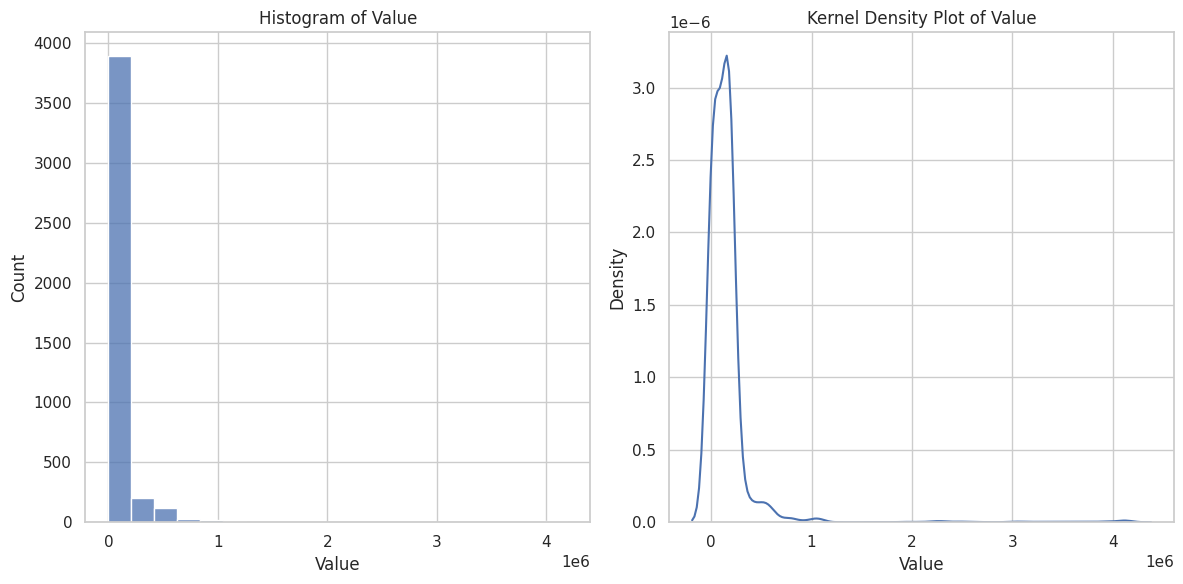

In [ ]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df['Value'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of Value')

# Kernel Density Plot
sns.kdeplot(df['Value'], ax=axes[1])
axes[1].set_title('Kernel Density Plot of Value')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Log transform 'Value'
encoded_df['Value_log'] = np.log(encoded_df['Value'])

# Create interaction features
encoded_df['pop_interaction_ratio'] = encoded_df['rural pop'] / encoded_df['urban pop']
encoded_df['electric_ratio'] = encoded_df['electric_rural'] / encoded_df['rural pop']

# Drop the original 'Value' column
encoded_df.drop('Value', axis=1, inplace=True)

# Display the updated DataFrame
encoded_df.head()

,Year,rural pop,urban pop,electric_rural,electric_urban,Location_encoded,Value_log,pop_interaction_ratio,electric_ratio
0,1960,18.471,81.529,33287.006341,146925.252557,0.015444,12.101891,0.226557,1802.122589
1,1961,18.059,81.941,32544.531834,147667.727063,0.015444,12.101891,0.220390,1802.122589
2,1962,17.772,82.228,32027.322651,148184.936246,0.015444,12.101891,0.216131,1802.122589
3,1963,17.489,82.511,31517.321959,148694.936939,0.015444,12.101891,0.211960,1802.122589
4,1964,17.208,82.792,31010.925511,149201.333386,0.015444,12.101891,0.207846,1802.122589


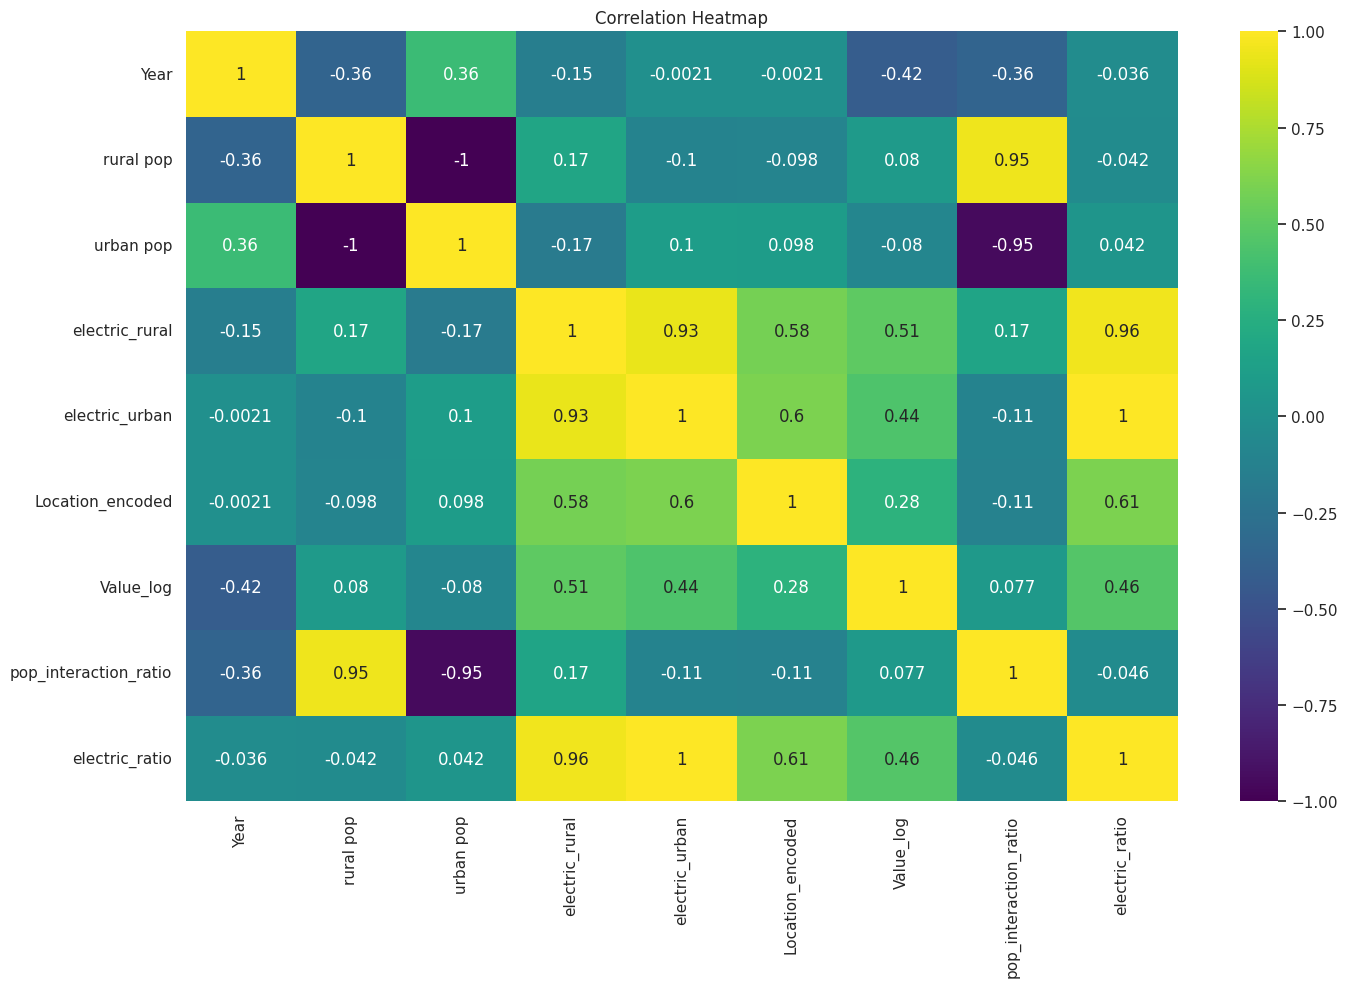

In [ ]:

# Create a larger figure
plt.figure(figsize=(16, 10))

# Create a heatmap using seaborn
sns.heatmap(encoded_df.corr(), cmap='viridis', annot=True)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
encoded_df.shape

(4308, 9)